In [2]:
%load_ext autoreload
%autoreload 2
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import seaborn as sns
os.chdir('/Users/maksym/research/robustbench')
%matplotlib inline
sns.set()

np.random.seed(1)
np.set_printoptions(precision=6, suppress=True)
plot_height, legend_size = 10, 10
marker_size, line_width = 2.0, 1.0
label_size = 13

dataset_dict = {'cifar10': 'CIFAR-10', 'cifar100': 'CIFAR-100'}


In [71]:
os.system("rm -rf /Users/maksym/research/robustbench/model_info/calibration_stats.npy")
os.system("scp -r -p 'andriush@iccluster131.iccluster.epfl.ch:/tmldata1/andriush/robustbench/model_info/calibration_stats.npy' /Users/maksym/research/robustbench/model_info/")


0

Stats were computed on 1000 examples.
dataset=cifar10, threat_model=Linf


<ipython-input-5-56a92abd655e>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])
<ipython-input-5-56a92abd655e>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(v) for v in ax.get_yticks()])
<ipython-input-5-56a92abd655e>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])
<ipython-input-5-56a92abd655e>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.1%}'.format(v) for v in ax.get_yticks()])
<ipython-input-5-56a92abd655e>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])


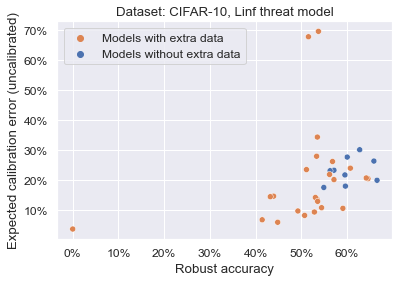

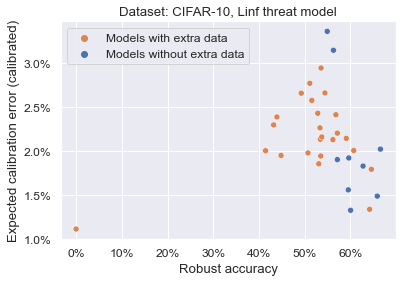

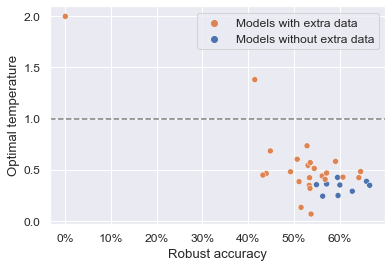

In [5]:
### 
threat_model_caption_dict = {'Linf': '$\ell_\infty$ robust accuracy',
                             'L2': '$\ell_\infty$ robust accuracy',
                             'corruptions': 'Common corruption accuracy'}
metrics = np.load('model_info/calibration_stats.npy', allow_pickle=True).item()
print('Stats were computed on {} examples.'.format(metrics['n_ex']))

datasets = ['cifar10']  # np.unique(metrics['dataset']):
threat_models = ['Linf']  # np.unique(metrics['threat_model'])
for dataset in datasets:  
    for threat_model in threat_models:  # :
        current_models = (metrics['dataset'] == dataset) & (metrics['threat_model'] == threat_model)
        if np.all(current_models == False): continue
        print('dataset={}, threat_model={}'.format(dataset, threat_model))
        
        metrics['extra_data'] = metrics['extra_data'].astype('object')
        metrics['extra_data'][metrics['extra_data'] == True] = 'Models without extra data'
        metrics['extra_data'][metrics['extra_data'] == False] = 'Models with extra data'

        colors_extra_data = sns.color_palette()[:2][::-1]  # TODO: make sure it's correct
        colors_extra_data = colors_extra_data[::-1] if threat_model == 'L2' else colors_extra_data
        if len(np.unique(metrics['extra_data'][current_models])) == 1:
            colors_extra_data = [colors_extra_data[0]]
        
        
        ax = sns.scatterplot(x=metrics['rob_acc'][current_models], y=metrics['ece'][current_models], 
                             hue=metrics['extra_data'][current_models], palette=colors_extra_data)
        ax.set_xlabel('Robust accuracy')
        ax.set_ylabel('Expected calibration error (uncalibrated)')
        ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])
        ax.set_yticklabels(['{:.0%}'.format(v) for v in ax.get_yticks()])
        ax.legend(loc='best')  # TODO: rather best
        plt.title('Dataset: {}, {} threat model'.format(dataset_dict[dataset], threat_model))
        plt.savefig('images/ece-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
        plt.show()
        
        
        ax = sns.scatterplot(x=metrics['rob_acc'][current_models], y=metrics['ece_t'][current_models], 
                             hue=metrics['extra_data'][current_models], palette=colors_extra_data)
        ax.set_xlabel('Robust accuracy')
        ax.set_ylabel('Expected calibration error (calibrated)')
        ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])
        ax.set_yticklabels(['{:.1%}'.format(v) for v in ax.get_yticks()])
        ax.legend(loc='best')
        plt.title('Dataset: {}, {} threat model'.format(dataset_dict[dataset], threat_model))
        plt.savefig('images/ece_t-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
        plt.show()
        
        
        ax = sns.scatterplot(x=metrics['rob_acc'][current_models], y=metrics['t_opt'][current_models], 
                             hue=metrics['extra_data'][current_models], palette=colors_extra_data)
        plt.axhline(y=1.0, color='gray', linestyle='--')
        ax.set_xlabel('Robust accuracy')
        ax.set_ylabel('Optimal temperature')
        ax.set_xticklabels(['{:.0%}'.format(v) for v in ax.get_xticks()])
        ax.legend(loc='best')
        # plt.title('Dataset: {}, {} threat model'.format(dataset_dict[dataset], threat_model))
        plt.savefig('images/t_opt-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
        plt.show()
        
        


/usr/local/lib/python3.9/site-packages/brokenaxes.py:122: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/usr/local/lib/python3.9/site-packages/brokenaxes.py:124: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.9/site-packages/brokenaxes.py:252: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  for ax in self.axs if ax.is_last_row())
/usr/local/lib/python3.9/site-packages/brokenaxes.py:261: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases

Stats were computed on 1000 examples.
dataset=cifar10, threat_model=Linf


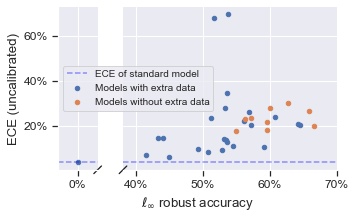

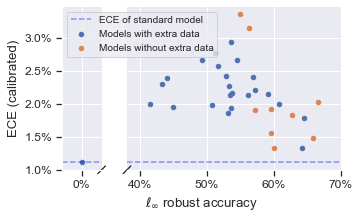

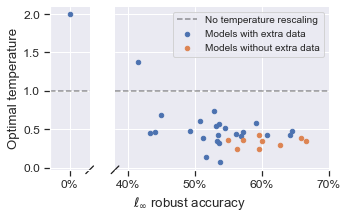

In [13]:
### Customized plots with a broken x-axis: Linf
threat_model_caption_dict = {'Linf': '$\ell_\infty$ robust accuracy',
                             'L2': '$\ell_\infty$ robust accuracy',
                             'corruptions': 'Common corruption accuracy'}
metrics = np.load('model_info/calibration_stats.npy', allow_pickle=True).item()
print('Stats were computed on {} examples.'.format(metrics['n_ex']))

dataset, threat_model = 'cifar10', 'Linf'

current_models = (metrics['dataset'] == dataset) & (metrics['threat_model'] == threat_model)
print('dataset={}, threat_model={}'.format(dataset, threat_model))
xlims_broken_axis = ((-0.03, 0.03), (0.38, 0.70))

colors_extra_data = sns.color_palette()[:2]
fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['ece'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['ece'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=metrics['ece'][current_models][metrics['rob_acc'][current_models]==0], color='blue', linestyle='--', alpha=0.4, label='ECE of standard model')
ax.set_ylabel('ECE (uncalibrated)', labelpad=38)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
    axis.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
ax.legend(loc='center left', fontsize=legend_size)  
plt.savefig('images/ece-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()


fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['ece_t'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['ece_t'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=metrics['ece_t'][current_models][metrics['rob_acc'][current_models]==0], color='blue', linestyle='--', alpha=0.4, label='ECE of standard model')
ax.set_ylabel('ECE (calibrated)', labelpad=42)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
    axis.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=1))
ax.legend(loc='upper left', fontsize=legend_size)  
plt.savefig('images/ece_t-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()


fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['t_opt'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['t_opt'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.4, label='No temperature rescaling')
ax.set_ylabel('Optimal temperature', labelpad=30)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
ax.legend(loc='upper right', fontsize=legend_size)  
plt.savefig('images/t_opt-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()
        



/usr/local/lib/python3.9/site-packages/brokenaxes.py:122: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/usr/local/lib/python3.9/site-packages/brokenaxes.py:124: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.9/site-packages/brokenaxes.py:252: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  for ax in self.axs if ax.is_last_row())
/usr/local/lib/python3.9/site-packages/brokenaxes.py:261: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases

Stats were computed on 1000 examples.
dataset=cifar10, threat_model=L2


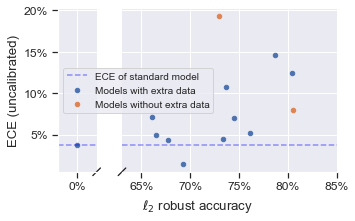

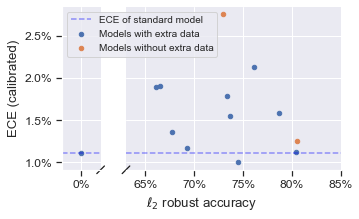

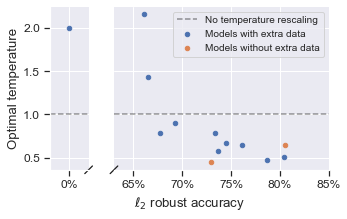

In [16]:
### Customized plots with a broken x-axis: L2
threat_model_caption_dict = {'Linf': '$\ell_\infty$ robust accuracy',
                             'L2': '$\ell_2$ robust accuracy',
                             'corruptions': 'Common corruption accuracy'}
metrics = np.load('model_info/calibration_stats.npy', allow_pickle=True).item()
print('Stats were computed on {} examples.'.format(metrics['n_ex']))

dataset, threat_model = 'cifar10', 'L2'

current_models = (metrics['dataset'] == dataset) & (metrics['threat_model'] == threat_model)
print('dataset={}, threat_model={}'.format(dataset, threat_model))
xlims_broken_axis = ((-0.02, 0.02), (0.63, 0.85))

colors_extra_data = sns.color_palette()[:2]
fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['ece'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['ece'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=metrics['ece'][current_models][metrics['rob_acc'][current_models]==0], color='blue', linestyle='--', alpha=0.4, label='ECE of standard model')
ax.set_ylabel('ECE (uncalibrated)', labelpad=38)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
    axis.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
ax.legend(loc='center left', fontsize=legend_size)  
plt.savefig('images/ece-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()


fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['ece_t'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['ece_t'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=metrics['ece_t'][current_models][metrics['rob_acc'][current_models]==0], color='blue', linestyle='--', alpha=0.4, label='ECE of standard model')
ax.set_ylabel('ECE (calibrated)', labelpad=42)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
    axis.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=1))
ax.legend(loc='upper left', fontsize=legend_size)  
plt.savefig('images/ece_t-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()


fig = plt.figure(figsize=(5, 3))
ax = brokenaxes(xlims=xlims_broken_axis, hspace=.05)
idx_extra_data = metrics['extra_data'][current_models]
ax.scatter(x=metrics['rob_acc'][current_models][~idx_extra_data], y=metrics['t_opt'][current_models][~idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[0], label='Models with extra data')  # , palette=colors_extra_data)
ax.scatter(x=metrics['rob_acc'][current_models][idx_extra_data], y=metrics['t_opt'][current_models][idx_extra_data], 
           marker='o', s=20, c=colors_extra_data[1], label='Models without extra data') 
ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.4, label='No temperature rescaling')
ax.set_ylabel('Optimal temperature', labelpad=30)  # order matters: first ylabel, then xlabel
ax.set_xlabel(threat_model_caption_dict[threat_model], labelpad=25)
for axis in ax.axs:
    axis.xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=0))
ax.legend(loc='upper right', fontsize=legend_size)  
plt.savefig('images/t_opt-vs-rob_acc-dataset={}-threat_model={}.pdf'.format(dataset, threat_model), bbox_inches='tight', pad_inches=0.0)
plt.show()




/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-3-e04a788af329>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])


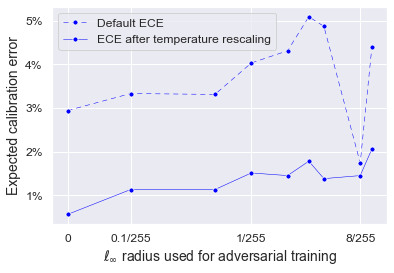

In [3]:
### In-distribution calibration for Linf AT models with different eps
linf_ece_list = [2.94, 3.33, 3.31, 4.03, 4.31, 5.09, 4.87, 1.74, 4.40]
linf_ece_t_list = [0.56, 1.13, 1.13, 1.51, 1.45, 1.78, 1.38, 1.45, 2.06]
t_opt =[1.502, 1.447, 1.412, 1.420, 1.408, 1.458, 1.427, 1.054, 0.753]
epss_linf = [0.0, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0, 10.0]

sns.set(font_scale=1.1)
marker_size, line_width = 5.0, 0.5

fake_eps0 = 0.03
epss_linf[0] = fake_eps0

ax = sns.lineplot(epss_linf, linf_ece_list, linewidth=line_width, marker='o', markersize=marker_size, label='Default ECE', color='blue')
ax = sns.lineplot(epss_linf, linf_ece_t_list, linewidth=line_width, marker='o', markersize=marker_size, label='ECE after temperature rescaling', color='blue')
dashed_linestyle = (0, (10, 8))  # 'dashed'
ax.lines[0].set_linestyle(dashed_linestyle)
        
# plt.ylim(0 if early_stopping else -3, 100)
ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])
xlabel = '$\ell_\infty$ radius used for adversarial training'
ax.set_xlabel(xlabel, size=14)
ax.set_xscale('log')
plt.xticks([fake_eps0, 0.1, 1.0, 8.0], [fake_eps0, 0.1, 1.0, 8.0])#np.log10(np.log10(y)), y)
ax.set_xticklabels(['0', '0.1/255', '1/255', '8/255'])
ax.set_ylabel('Expected calibration error', size=14)

ax.legend().get_lines()[0].set_linestyle(dashed_linestyle)

plt.savefig('images/calibration_vs_eps_linf.pdf', bbox_inches='tight')
plt.show()




/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-4-0f7444f22350>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])


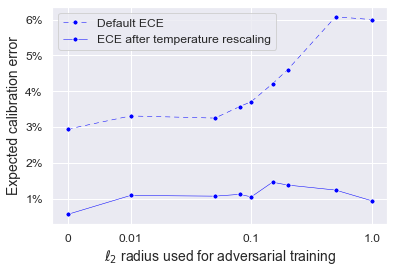

In [4]:
### In-distribution calibration for L2 AT models with different eps
l2_ece_list = [2.94, 3.31, 3.25, 3.57, 3.71, 4.21, 4.60, 6.08, 6.00]
l2_ece_t_list = [0.56, 1.09, 1.07, 1.12, 1.05, 1.46, 1.38, 1.24, 0.94]
t_opt = [1.502, 1.462, 1.441, 1.471, 1.495, 1.477, 1.527, 1.712, 1.451]
epss_l2 = [0.0, 0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.5, 1.0]

sns.set(font_scale=1.1)
marker_size, line_width = 5.0, 0.5

fake_eps0 = 0.003
epss_l2[0] = fake_eps0

ax = sns.lineplot(epss_l2, l2_ece_list, linewidth=line_width, marker='o', markersize=marker_size, label='Default ECE', color='blue')
ax = sns.lineplot(epss_l2, l2_ece_t_list, linewidth=line_width, marker='o', markersize=marker_size, label='ECE after temperature rescaling', color='blue')
dashed_linestyle = (0, (10, 8))  # 'dashed'
ax.lines[0].set_linestyle(dashed_linestyle)
        
# plt.ylim(0 if early_stopping else -3, 100)
ax.set_yticklabels(['{:.0%}'.format(x/100) for x in ax.get_yticks()])
xlabel = '$\ell_2$ radius used for adversarial training'
ax.set_xlabel(xlabel, size=14)
ax.set_xscale('log')
plt.xticks([fake_eps0, 0.01, 0.1, 1.0], [fake_eps0, 0.01, 0.1, 1.0])#np.log10(np.log10(y)), y)
ax.set_xticklabels(['0', '0.01', '0.1', '1.0'])
ax.set_ylabel('Expected calibration error', size=14)

ax.legend().get_lines()[0].set_linestyle(dashed_linestyle)

plt.savefig('images/calibration_vs_eps_l2.pdf', bbox_inches='tight')
plt.show()

